# Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np

import pandas_profiling

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [2]:
%run import.ipynb

## Target variable

In [3]:
y.describe()

count    1.710756e+06
mean     2.217509e-04
std      2.240643e-02
min     -8.609413e-02
25%     -9.561389e-03
50%     -1.570681e-04
75%      9.520990e-03
max      9.349781e-02
Name: y, dtype: float64

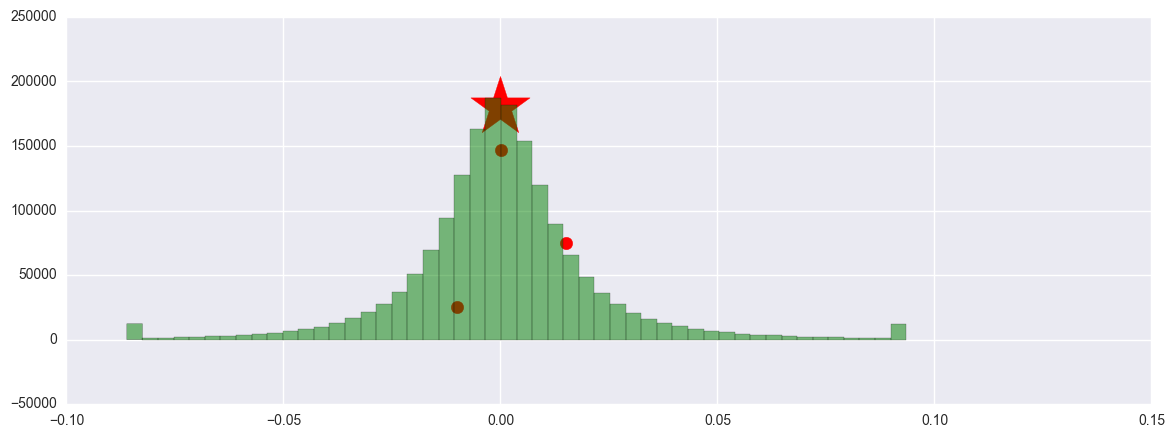

In [30]:
plt.figure(figsize = (14, 5));
plt.hist(y, bins = 50, color = 'green', alpha = 0.5);

balls = pd.DataFrame([[-0.01, 0.0002, 0.015], [25000, 147000, 75000]]).transpose()
plt.scatter(balls[0], balls[1], color = 'red', s = 80, marker = 'o');

star = pd.DataFrame([[0.0], [180000]]).transpose()
plt.scatter(star[0], star[1], color = 'red', s = 2000, marker = '*');

## Features

In [4]:
X.shape

(1710756, 110)

In [3]:
X.columns

Index(['id', 'timestamp', 'derived_0', 'derived_1', 'derived_2', 'derived_3',
       'derived_4', 'fundamental_0', 'fundamental_1', 'fundamental_2',
       ...
       'technical_35', 'technical_36', 'technical_37', 'technical_38',
       'technical_39', 'technical_40', 'technical_41', 'technical_42',
       'technical_43', 'technical_44'],
      dtype='object', length=110)

In [5]:
cols = X.columns
n_rows = X.shape[0]
nulls_sum = []

for c in cols:
    current_nulls_sum = sum(X[c].isnull())
    nulls_sum.append(current_nulls_sum)

In [6]:
nulls = pd.DataFrame({'column' : cols, 'n' : nulls_sum})
nulls['percent'] = round(nulls.n * 100 / n_rows, 2)

In [7]:
nulls.sort_values(by = 'percent',
                  ascending = False).head(20)

,column,n,percent
11,fundamental_5,962020,56.23
44,fundamental_38,803489,46.97
12,fundamental_6,701625,41.01
8,fundamental_1,679070,39.69
67,fundamental_61,671801,39.27
34,fundamental_28,667331,39.01
32,fundamental_26,657184,38.41
63,fundamental_57,657184,38.41
30,fundamental_24,576655,33.71
15,fundamental_9,565567,33.06


In [31]:
nulls.to_csv('nulls_by_features.csv', index = False)

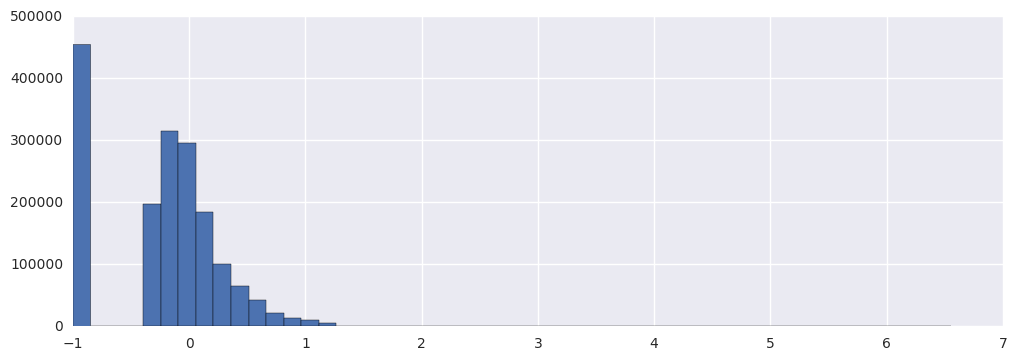

In [37]:
plt.figure(figsize = (12, 4));
plt.hist(X.fundamental_3.fillna(-1), bins = 50);

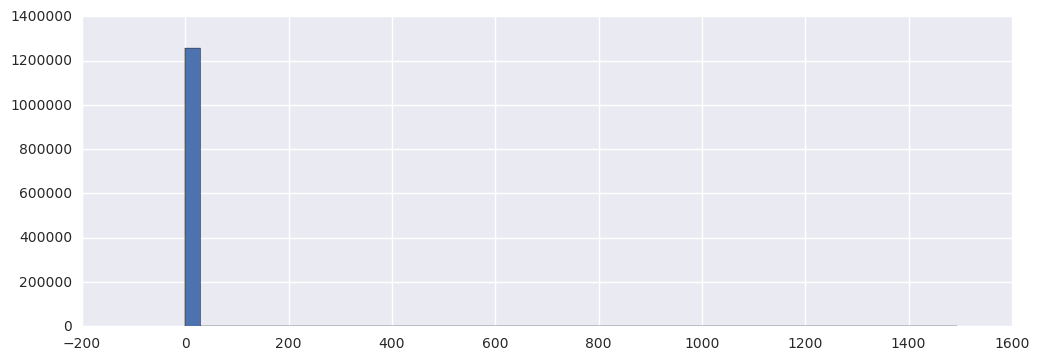

In [38]:
plt.figure(figsize = (12, 4));
plt.hist(X.fundamental_31[X.fundamental_31.isnull() == False], bins = 50);

### Taking subsample

In [13]:
X_subsample = X.sample(n = n_rows // 10)

In [15]:
del X

In [21]:
X_subsample.head(1)

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44
624349,448,714,0.008687,0.203457,0.082071,-0.258893,0.264414,-0.088042,NaN,0.259644,...,0.568245,0.265521,-0.425651,-2.608988e-07,-0.000087,-0.045391,-0.080528,-8.806499e-10,-0.851302,-0.030326


In [33]:
round(X_subsample.describe(), 3)

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44
count,171075.000,171075.000,163934.000,1.631180e+05,131372.000,156179.000,130554.000,168644.000,1.035430e+05,134223.000,...,170762.000,170813.000,169125.000,169125.000,169036.000,170838.000,166668.000,169037.000,170603.000,147402.000
mean,1092.563,946.465,-4.437,8.028181e+11,-0.455,-0.284,16.528,-0.021,-4.637954e+08,-0.167,...,-0.105,-0.087,-0.091,-0.081,-0.074,0.049,0.005,-0.016,-0.978,0.000
std,631.638,519.688,243.863,7.600294e+13,81.917,57.753,904.599,0.249,6.276055e+10,3.132,...,0.553,0.618,0.248,0.232,0.224,0.311,0.114,0.212,0.963,0.030
min,0.000,0.000,-20174.965,-7.400000e-02,-9839.687,-20892.678,-8551.914,-2.233,-1.043737e+13,-162.696,...,-1.379,-1.688,-1.000,-1.000,-1.000,-0.525,-0.432,-1.000,-2.000,-0.121
25%,548.000,507.000,-0.145,-2.900000e-02,-0.059,-0.166,-0.107,-0.199,-1.970000e-01,-0.228,...,-0.427,-0.407,-0.000,-0.000,-0.000,-0.153,-0.074,-0.000,-2.000,-0.020
50%,1098.000,956.000,0.000,6.000000e-03,0.022,0.003,0.011,-0.040,-8.000000e-03,-0.029,...,-0.112,-0.085,-0.000,-0.000,-0.000,-0.015,0.000,0.000,-0.681,0.000
75%,1657.000,1403.000,0.120,1.090000e-01,0.196,0.304,0.154,0.131,1.840000e-01,0.177,...,0.158,0.192,-0.000,0.000,0.000,0.178,0.079,0.000,-0.000,0.021
max,2158.000,1812.000,3252.059,1.068124e+16,3713.114,712.456,67859.648,1.350,5.202730e+02,76.771,...,11.620,39.553,-0.000,-0.000,0.000,1.569,0.647,1.000,0.000,0.140


In [32]:
X_subsample.to_csv('X_subsample.csv')

In [14]:
# %time rep = pandas_profiling.ProfileReport(X)
# rep.to_file('pandas_profiling_report.html')

## Correlations

In [10]:
correlations_with_target = X.corrwith(y)
correlations_with_target.sort_values(ascending = False).head(20)

technical_30      0.014272
fundamental_11    0.008151
fundamental_51    0.006013
fundamental_53    0.006009
fundamental_18    0.005123
technical_0       0.004328
fundamental_55    0.003846
technical_37      0.003783
fundamental_60    0.003421
fundamental_56    0.002926
fundamental_2     0.002646
fundamental_15    0.001970
technical_12      0.001834
fundamental_17    0.001646
fundamental_63    0.001558
technical_3       0.001544
fundamental_28    0.001452
technical_16      0.001413
technical_13      0.001377
derived_2         0.001369
dtype: float64

In [19]:
y_subsample = y[X_subsample.index]

correlations_with_target_subsample = X_subsample.corrwith(y_subsample)
correlations_with_target_subsample.sort_values(ascending = False).head(20)

technical_30      0.021711
fundamental_53    0.013818
fundamental_56    0.011127
fundamental_18    0.009424
fundamental_15    0.008129
fundamental_2     0.008028
technical_0       0.007305
fundamental_28    0.007291
technical_21      0.007148
derived_2         0.006924
derived_4         0.006193
fundamental_60    0.005580
fundamental_11    0.005496
fundamental_51    0.005461
fundamental_17    0.005293
fundamental_37    0.005166
fundamental_9     0.004530
technical_37      0.004159
fundamental_63    0.003777
timestamp         0.003193
dtype: float64

-----
Let's check:

* `fundamental_26`, `fundamental_57`
* `fundamental_31`, `fundamental_3`

In [17]:
X[['fundamental_26', 'fundamental_57']].corr()

,fundamental_26,fundamental_57
fundamental_26,1.000000,-0.000978
fundamental_57,-0.000978,1.000000


In [18]:
X[['fundamental_31', 'fundamental_3']].corr()

,fundamental_31,fundamental_3
fundamental_31,1.000000,0.017613
fundamental_3,0.017613,1.000000
